In [1]:

import numpy as np
import pandas as pd

# 1) Прочитаем файл:
titanic: pd.DataFrame = pd.read_csv("data/train.csv")
print(f"2) Первые 10 пассажиров \n{titanic.head(10)}")

print(f"3) Рассмотрим info датасета: \n{titanic.info()}")

print(f"4) Посмотрим describe датасета: \n{titanic.describe()}")

print(
    f"5) Выведем shape: {titanic.shape}, \ncolumns: {titanic.columns}, \ndtypes: {titanic.dtypes}"
)

# TODO:
# 1) Загрузить данные
# 2) Посмотреть первые/последние строки
# 3) Вывести info (типы данных, пропуски)
# 4) Вывести describe (статистика по числовым колонкам)
# 5) Проверить shape, columns, dtypes

2) Первые 10 пассажиров 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, 

1) Колонки с пропусками: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
866


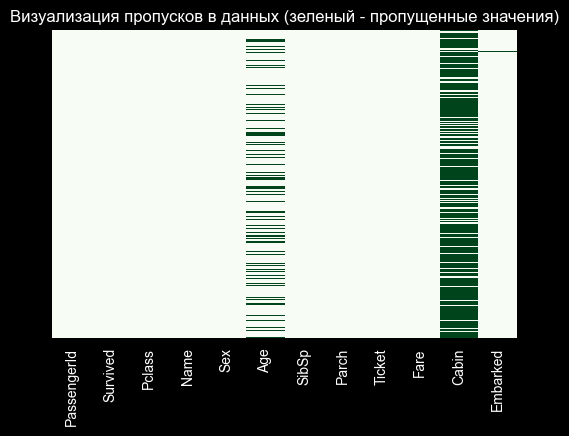


2) Заполнение Age:
Медиана Age: 28.0:.2f
Среднее Age: 29.69911764705882:.2f
Заполнено пропусков в Age: 177

3) Заполнение embarked:
Самое частое значение (мода): 'S'
Распределение до заполнения:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
Пропусков до: 2
Пропусков после: 0
Заполнено пропусков: 2
Распределение после заполнения: 
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Количество пропусков в Cabin до: 687, Доля пропусков в Cabin 77.10%
Исключим столбец Cabin из-за большого количества пропусков:
Столбец Cabin удален
Пропусков с столбцах: 0


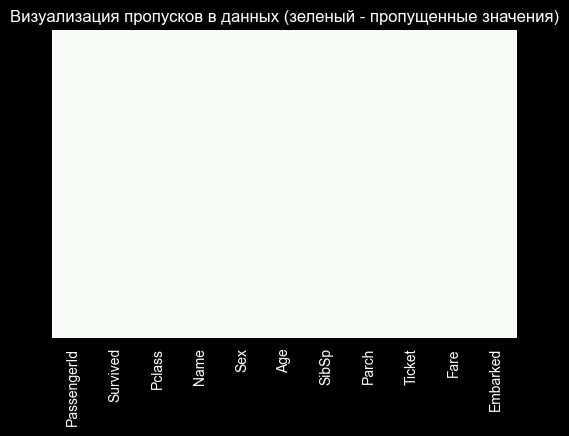

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Найти колонки с пропусками (визуализировать через seaborn heatmap)
print(f"1) Колонки с пропусками: \n{titanic.isnull().sum()}")

# Визуализация пропусков
print(titanic.isnull().sum().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="Greens")
plt.title("Визуализация пропусков в данных (зеленый - пропущенные значения)")
plt.show()

# 2) Заполнить Age медианой
print("\n2) Заполнение Age:")
print(f"Медиана Age: {titanic['Age'].median()}:.2f")
print(f"Среднее Age: {titanic['Age'].mean()}:.2f")
age_before = titanic["Age"].isnull().sum()
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
age_after = titanic["Age"].isnull().sum()
print(f"Заполнено пропусков в Age: {age_before - age_after}")

# 3) Заполнить Embarked модой
print("\n3) Заполнение embarked:")
embarked_mode = titanic["Embarked"].mode()[0]
print(f"Самое частое значение (мода): '{embarked_mode}'")

print("Распределение до заполнения:")
print(titanic["Embarked"].value_counts(dropna=False))

embarked_before = titanic["Embarked"].isnull().sum()
print(f"Пропусков до: {embarked_before}")

titanic["Embarked"] = titanic["Embarked"].fillna(embarked_mode)

embarked_after = titanic["Embarked"].isnull().sum()
print(f"Пропусков после: {embarked_after}")
print(f"Заполнено пропусков: {embarked_before - embarked_after}")

print(f"Распределение после заполнения: \n{titanic['Embarked'].value_counts()}")

# 4) Удалить Cabin (слишком много пропусков)
print(
    f"Количество пропусков в Cabin до: {titanic['Cabin'].isnull().sum()},"
    f" Доля пропусков в Cabin {titanic['Cabin'].isnull().sum() / len(titanic) * 100:.2f}%"
)
print("Исключим столбец Cabin из-за большого количества пропусков:")
titanic.drop(["Cabin"], axis=1, inplace=True)
print("Столбец Cabin удален")

# 5) Проверить, что пропусков не осталось
print(f"Пропусков с столбцах: {titanic.isnull().sum().sum()}")
plt.figure(figsize=(6, 4))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="Greens")
plt.title("Визуализация пропусков в данных (зеленый - пропущенные значения)")
plt.show()

In [3]:
# 1) Выбрать всех женщин
women = titanic[titanic["Sex"] == "female"]
print(f"Данные только с женщинами: \n{women.head(5)}")

# 2) Выбрать пассажиров 1 класса старше 30 лет
# Объединяем условия в один фильтр для эффективности
first_class_seniors = titanic[(titanic["Pclass"] == 1) & (titanic["Age"] > 30)]
print(
    f"Данные только с пассажирами 1 класса старше 30 лет: \n{first_class_seniors.head(5)}"
)

# 3) Выбрать выживших детей (Age < 18)
survived_children = titanic[(titanic["Age"] < 18) & (titanic["Survived"] == 1)]
print(f"Данные только выживших детей: \n{survived_children.head(5)}")

# 4) Использовать query() метод для сложных фильтров
# 1)
women_query = titanic.query("Sex == 'female'")
print(f"Используя query, выбрали данные только с женщинами: \n{women_query.head(5)}")

# 2)
first_class_seniors_query = titanic.query("Pclass == 1 & Age > 30")
print(
    f"Используя query, выбрали данные только пассажирами 1 класса старше 30 лет: \n{first_class_seniors_query.head(5)}"
)

# 3)
survived_children_query = titanic.query("Survived == 1 & Age < 18")
print(
    f"Используя query, выбрали данные только выживших детей: \n{survived_children_query.head(5)}"
)

# 1) Выбрать всех женщин
# 2) Выбрать пассажиров 1 класса старше 30 лет
# 3) Выбрать выживших детей (Age < 18)
# 4) Использовать query() метод для сложных фильтров

Данные только с женщинами: 
   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C  
Данные тол

In [4]:
# 1)
mean_age = titanic.groupby("Pclass")["Age"].mean()
print(mean_age)

# 2)
percent_survived = titanic.groupby("Sex")["Survived"].mean() * 100
print(f"Проценты выживших по полу: \n{percent_survived.round(2)}")

# 3)
sr = titanic.groupby(["Pclass", "Embarked"])["Fare"].mean()
print(f"Средняя цена билета по классу и порту посадки: \n{sr.round(2)}")

# 4)
fare_mean_pivot = titanic.pivot_table(
    values="Fare",
    index="Pclass",
    columns="Sex",
    aggfunc=["mean", "median", "min", "max"],
    margins=True,
)
print(f"Анализ цен билетов по классу и полу: \n{fare_mean_pivot}")

multi_metric_pivot = titanic.pivot_table(
    values=["Age", "Fare", "Survived"],
    index="Pclass",
    columns="Sex",
    aggfunc={"Age": "mean", "Fare": "median", "Survived": "sum"},
    fill_value="-",
).round(2)
print(f"Статистика по полу и классу: \n{multi_metric_pivot}")


# TODO:
# 1) Средний возраст по классам (Pclass)
# 2) Процент выживших по полу
# 3) Средняя цена билета по классу и порту посадки (Pclass, Embarked)
# 4) Использовать pivot_table для создания сводной таблицы

Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64
Проценты выживших по полу: 
Sex
female    74.20
male      18.89
Name: Survived, dtype: float64
Средняя цена билета по классу и порту посадки: 
Pclass  Embarked
1       C           104.72
        Q            90.00
        S            70.51
2       C            25.36
        Q            12.35
        S            20.33
3       C            11.21
        Q            11.18
        S            14.64
Name: Fare, dtype: float64
Анализ цен билетов по классу и полу: 
              mean                          median                        min  \
Sex         female       male        All    female     male      All   female   
Pclass                                                                          
1       106.125798  67.226127  84.154687  82.66455  41.2625  60.2875  25.9292   
2        21.970121  19.741782  20.662183  22.00000  13.0000  14.2500  10.5000   
3        16.118810  12.661633  13.675550  12.4750

In [5]:
# 1)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1
print(titanic.value_counts())

# 2)
titanic["IsAlone"] = titanic["FamilySize"] == 1
print(titanic["IsAlone"].value_counts())

# 3)
# 1. Запоминаем титулы
titanic_copy = titanic.copy()
titles = titanic_copy["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
# 2. Удаляем титулы из Name
titanic_copy["Name"] = titanic_copy["Name"].str.replace(
    r" ([A-Za-z]+)\.", "", regex=True
)
print(titanic_copy["Name"].value_counts())


# 4)
# 1 Способ
def categorize_age(age):
    if pd.isna(age):
        return "Unknown"
    elif age < 18:
        return "Child"
    elif age < 30:
        return "Teen"
    elif age < 60:
        return "Adult"
    return "Senior"


titanic["AgeBin"] = titanic["Age"].apply(categorize_age)
print(titanic["AgeBin"].value_counts())

# 2 Способ с использованием cut для равномерных интервалов
titanic["AgeBinCut"] = pd.cut(
    titanic["Age"],
    bins=[0, 12, 18, 60, 100],
    labels=["Child", "Teen", "Adult", "Senior"],
    right=False,
)
print(titanic["AgeBinCut"].value_counts())


# TODO:
# 1) Создать FamilySize = SibSp + Parch + 1
# 2) Создать IsAlone = (FamilySize == 1)
# 3) Извлечь Title из Name (Mr, Mrs, Miss, Master, etc.)
# 4) Создать AgeBin (категоризация возраста: Child, Teen, Adult, Senior)

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket            Fare     Embarked  FamilySize
1            0         3       Braund, Mr. Owen Harris                              male    22.0  1      0      A/5 21171         7.2500   S         2             1
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599          71.2833  C         2             1
3            1         3       Heikkinen, Miss. Laina                               female  26.0  0      0      STON/O2. 3101282  7.9250   S         1             1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803            53.1000  S         2             1
5            0         3       Allen, Mr. William Henry                             male    35.0  0      0      373450            8.0500   S         1             1
               

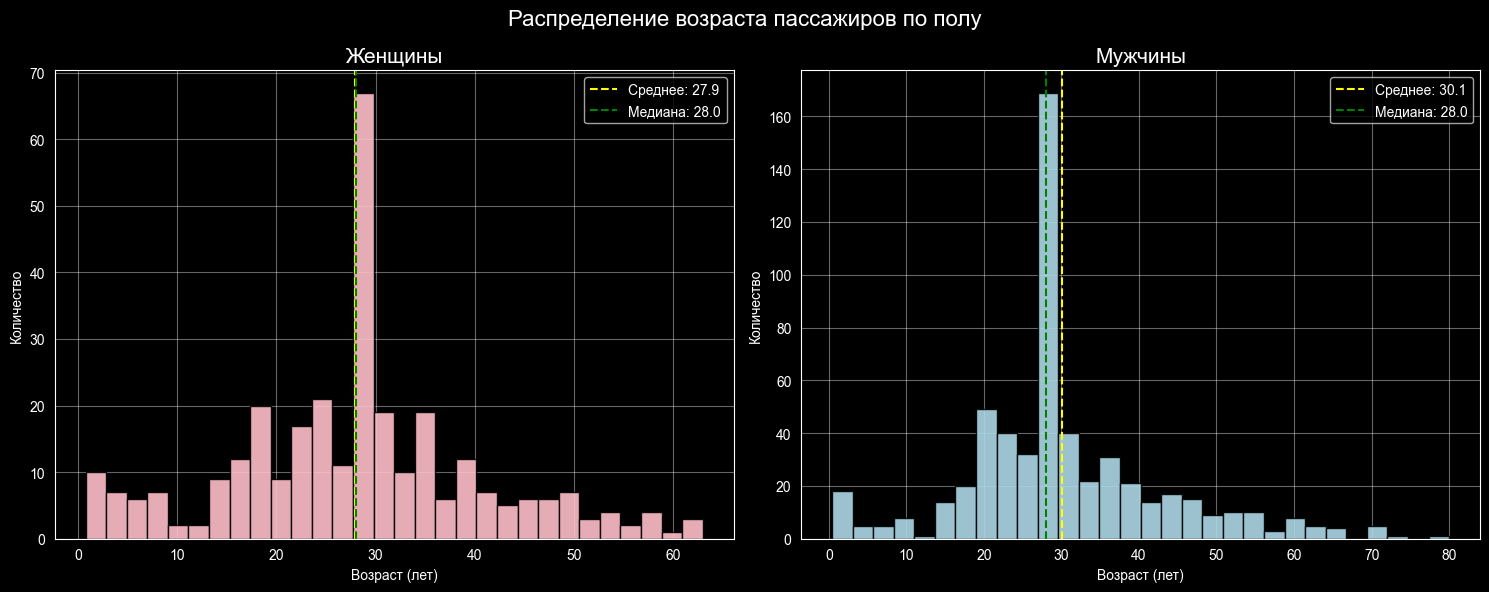

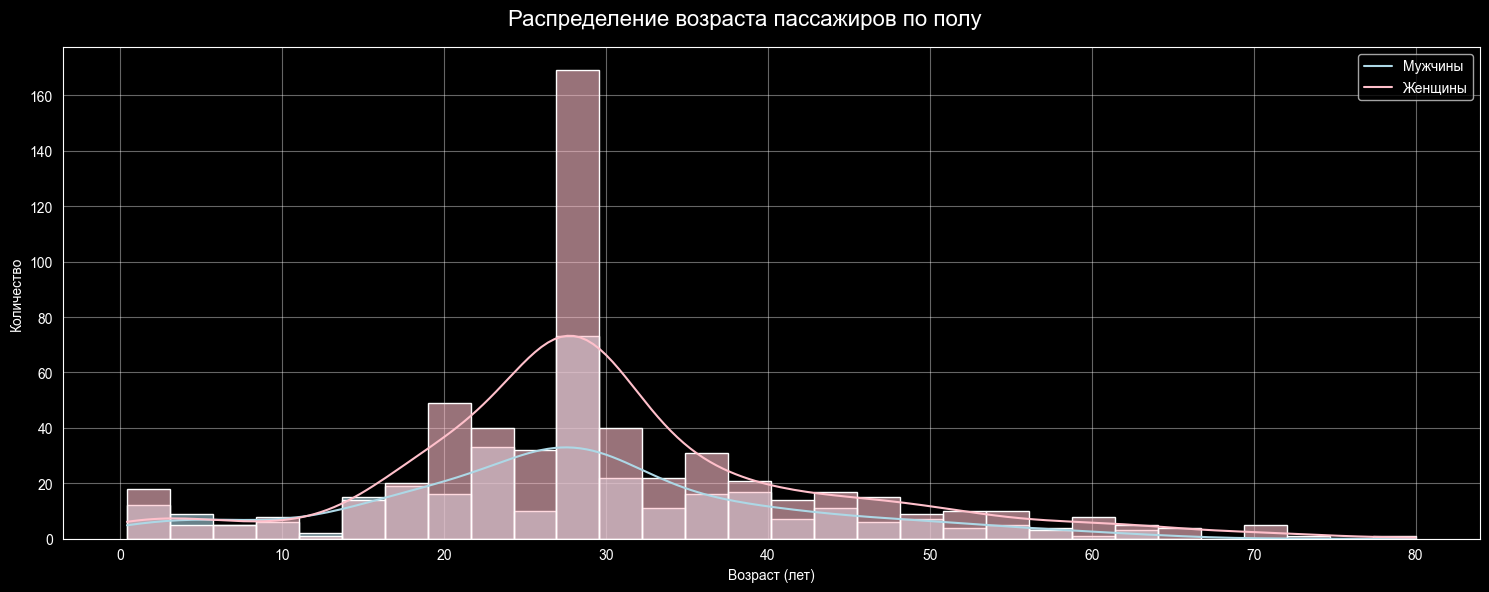

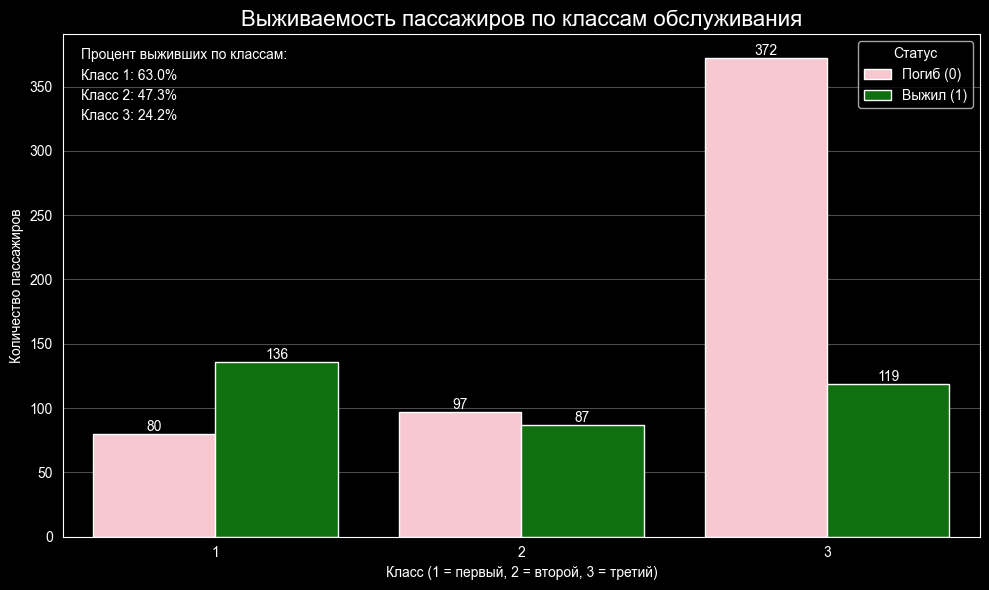

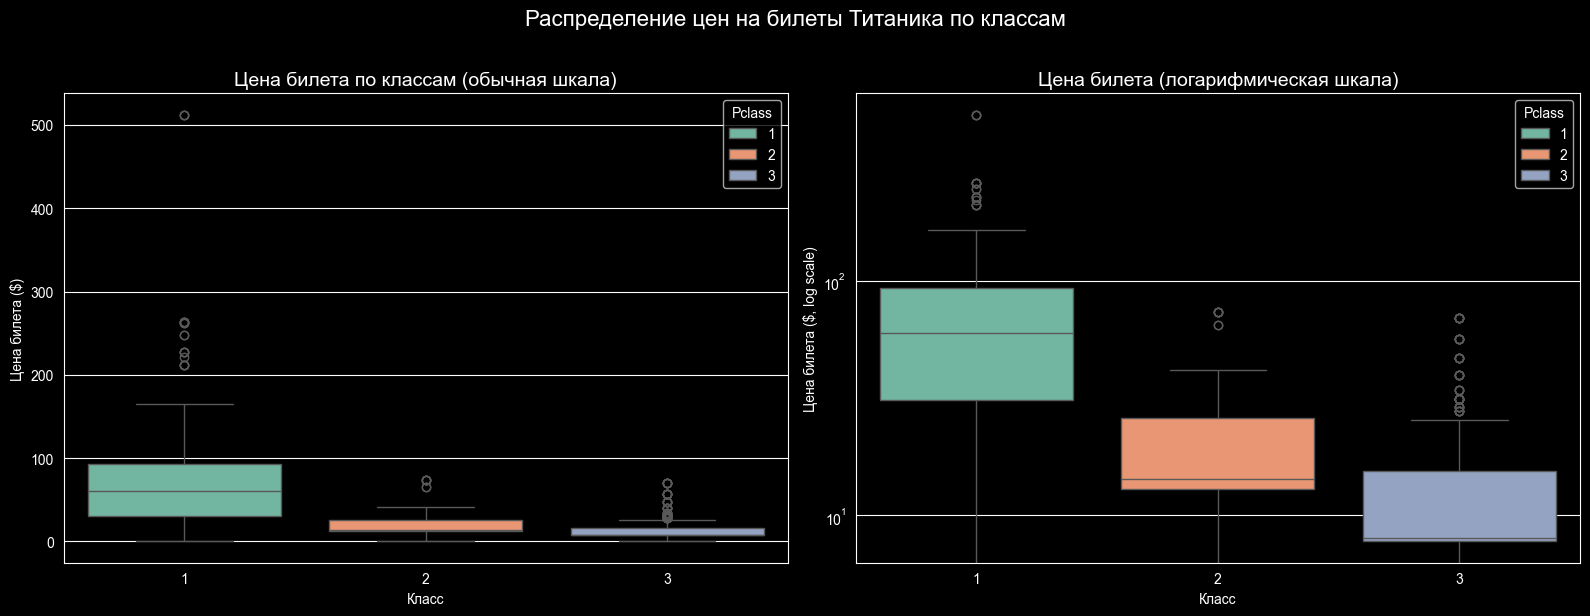

Статистика цен по классам:
         mean    50%  min     max
Pclass                           
1       84.15  60.29  0.0  512.33
2       20.66  14.25  0.0   73.50
3       13.68   8.05  0.0   69.55


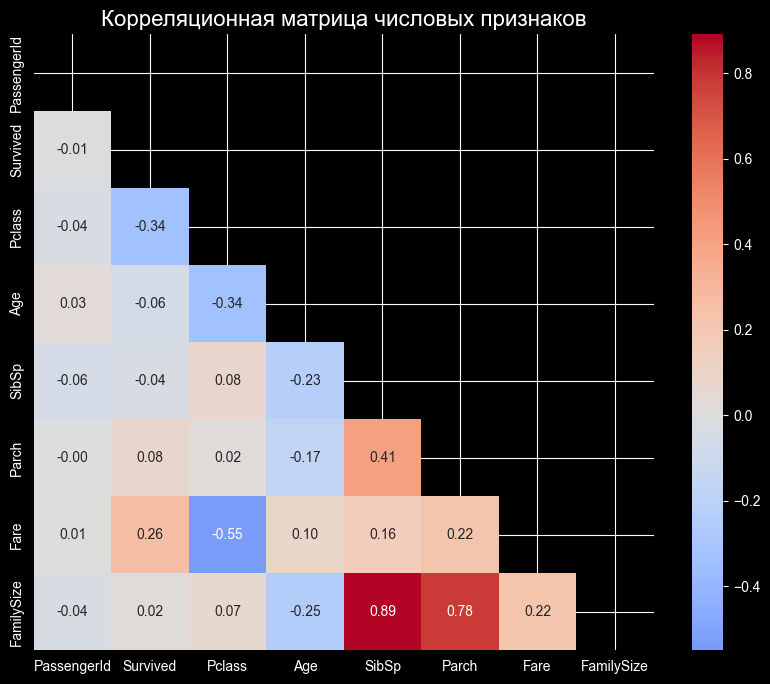

Корреляция признаков с Survived:
Fare      : +0.257
Parch     : +0.082
FamilySize: +0.017
PassengerId: -0.005
SibSp     : -0.035
Age       : -0.065
Pclass    : -0.338


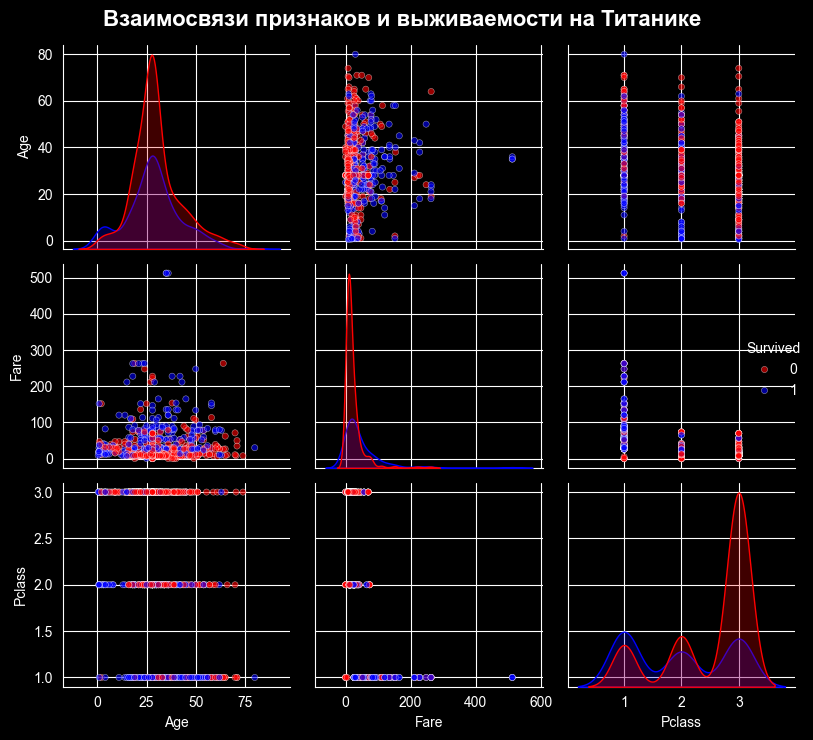

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1)
# 1 Способ
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
woman_age = titanic[titanic["Sex"] == "female"]["Age"].dropna()
axes[0].hist(woman_age, bins=30, alpha=0.9, color="pink", edgecolor="black")
axes[0].set_title("Женщины", fontsize=15)
axes[0].set_xlabel("Возраст (лет)")
axes[0].set_ylabel("Количество")
axes[0].grid(True, alpha=0.4)
axes[0].axvline(
    woman_age.mean(),
    color="yellow",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Среднее: {woman_age.mean():.1f}",
)
axes[0].axvline(
    woman_age.median(),
    color="green",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Медиана: {woman_age.median():.1f}",
)
axes[0].legend()

men_age = titanic[titanic["Sex"] == "male"]["Age"].dropna()
axes[1].hist(men_age, bins=30, alpha=0.9, color="lightblue", edgecolor="black")
axes[1].set_title("Мужчины", fontsize=15)
axes[1].set_xlabel("Возраст (лет)")
axes[1].set_ylabel("Количество")
axes[1].grid(True, alpha=0.4)
axes[1].axvline(
    men_age.mean(),
    color="yellow",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Среднее: {men_age.mean():.1f}",
)
axes[1].axvline(
    men_age.median(),
    color="green",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Медиана: {men_age.median():.1f}",
)
axes[1].legend()

plt.suptitle("Распределение возраста пассажиров по полу", fontsize=16)
plt.tight_layout()
plt.show()

# 2 Способ
plt.figure(figsize=(15, 6))
sns.histplot(
    data=titanic,
    x="Age",
    hue="Sex",
    bins=30,
    kde=True,
    alpha=0.6,
    palette=["pink", "lightblue"],
)
plt.xlabel("Возраст (лет)")
plt.ylabel("Количество")
plt.grid(True, alpha=0.4)
plt.legend(["Мужчины", "Женщины"])

plt.suptitle("Распределение возраста пассажиров по полу", fontsize=16)
plt.tight_layout()
plt.show()

# 2)
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=titanic, x="Pclass", hue="Survived", palette={0: "pink", 1: "green"}
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
            fontsize=10,
        )

plt.title("Выживаемость пассажиров по классам обслуживания", fontsize=16)
plt.xlabel("Класс (1 = первый, 2 = второй, 3 = третий)")
plt.ylabel("Количество пассажиров")
plt.legend(["Погиб (0)", "Выжил (1)"], title="Статус")

plt.text(
    0.02,
    0.95,
    "Процент выживших по классам:",
    transform=plt.gca().transAxes,
    fontsize=10,
)

survival_by_class = titanic.groupby("Pclass")["Survived"].mean()
for i, pclass in enumerate([1, 2, 3], 1):
    survival_rate = survival_by_class[pclass] * 100
    plt.text(
        0.02,
        0.95 - i * 0.04,
        f"Класс {pclass}: {survival_rate:.1f}%",
        transform=plt.gca().transAxes,
        fontsize=10,
    )

plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

# 3)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(
    data=titanic, x="Pclass", y="Fare", hue="Pclass", palette="Set2", ax=axes[0]
)
axes[0].set_title("Цена билета по классам (обычная шкала)", fontsize=14)
axes[0].set_xlabel("Класс")
axes[0].set_ylabel("Цена билета ($)")

sns.boxplot(
    data=titanic, x="Pclass", y="Fare", hue="Pclass", palette="Set2", ax=axes[1]
)
axes[1].set_yscale("log")
axes[1].set_title("Цена билета (логарифмическая шкала)", fontsize=14)
axes[1].set_xlabel("Класс")
axes[1].set_ylabel("Цена билета ($, log scale)")

fig.suptitle("Распределение цен на билеты Титаника по классам", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Статистика цен по классам:")
print(
    titanic.groupby("Pclass")["Fare"].describe()[["mean", "50%", "min", "max"]].round(2)
)

# 4)
corr = titanic.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=np.triu(np.ones_like(corr)),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
)
plt.title("Корреляционная матрица числовых признаков", fontsize=16)
plt.show()

print("Корреляция признаков с Survived:")
surv_corr = corr["Survived"].sort_values(ascending=False)
for feat, val in surv_corr.items():
    if feat != "Survived":
        print(f"{feat:10}: {val:+.3f}")

# 5)
g = sns.pairplot(
    titanic[["Age", "Fare", "Pclass", "Survived"]].dropna(),
    hue="Survived",
    palette={0: "red", 1: "blue"},
    plot_kws={"alpha": 0.6, "s": 20},
    diag_kind="kde",
    diag_kws={"fill": True},
)

g.fig.suptitle(
    "Взаимосвязи признаков и выживаемости на Титанике", fontsize=16, fontweight="bold"
)
plt.tight_layout()
plt.show()

# TODO:
# 1) Histogram возраста (с разделением по полу)
# 2) Countplot выживших по классам
# 3) Boxplot цены билета по классам
# 4) Correlation heatmap для числовых признаков
# 5) Pairplot для Age, Fare, Pclass, Survived